# 🐧 Projekt zaliczeniowy – Wstęp do uczenia maszynowego


Autorzy projektu: Joanna Mackiewicz, Krzysztof Lachs, Kinga Kaza

In [2]:
# import bibliotek
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [213]:
# import zbioru danych
df = pd.read_csv('https://raw.githubusercontent.com/Jo-llama/ML/refs/heads/main/penguins.csv')

In [214]:
df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


# Opis zbioru

## Zestaw danych Palmer Penguins

Zestaw danych **Palmer Penguins** zawiera informacje o pingwinach z trzech wysp archipelagu Palmer Station na Antarktydzie.

---

## Kolumny

| Kolumna              | Typ           | Opis |
|----------------------|---------------|------|
| `species`            | kategoryczna  | Gatunek pingwina: `Adelie`, `Chinstrap`, `Gentoo`. To będzie nasza zmienna zależna (*target*) w zadaniu klasyfikacji. |
| `island`             | kategoryczna  | Wyspa, na której zaobserwowano pingwina: `Torgersen`, `Biscoe`, `Dream`. |
| `culmen_length_mm`   | numeryczna    | Długość dzioba (culmen) w milimetrach. |
| `culmen_depth_mm`    | numeryczna    | Głębokość dzioba (od góry do dołu) w milimetrach. |
| `flipper_length_mm`  | numeryczna    | Długość płetwy w milimetrach. |
| `body_mass_g`        | numeryczna    | Masa ciała pingwina w gramach. |
| `sex`                | kategoryczna  | Płeć: `MALE`, `FEMALE`. Zdarzają się wartości brakujące. |

---

## Typowe zastosowanie

- **Klasyfikacja:** przewidywanie gatunku pingwina (`species`) na podstawie cech morfologicznych.  

---


 ## Czyszczenie zbioru

 ### Sprawdzanie brakujących wartości

In [215]:
# Lista kolumn numerycznych i kategorycznych
numerical_cols = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']
categorical_cols = ['species', 'island', 'sex']

In [216]:
# Sprawdzenie brakujących wartości
df.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [217]:
# Sprawdź liczbę zer w każdej kolumnie
zero_counts_original = (df == 0).sum()
zero_counts_original

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [218]:
# Filtruj i wyświetl wszystkie wiersze z brakującymi danymi
missing_rows = df[df.isnull().any(axis=1)]
missing_rows


,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN
246,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN
286,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN
324,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN


Widzimy, że dwie linijki nie posiadają żadnych informacji morfologicznych. Należy zatem usunąć te wiersze.

In [219]:
# Usuń wiersze, gdzie kolumny numeryczne mają brakujące dane
df_filtered = df.dropna(subset=numerical_cols).copy()


Przyglądamy się unikalnym wartościom w kolumnie `sex` 

In [220]:
# Pokaż wszystkie unikalne wartości w kolumnie 'sex'
df_filtered['sex'].dtype

# Pokaż wszystkie unikalne wartości z typem
for val in df_filtered['sex'].unique():
    print(f"{repr(val)} -> {type(val)}")
    

'MALE' -> <class 'str'>
'FEMALE' -> <class 'str'>
nan -> <class 'float'>
'.' -> <class 'str'>


Kolumna `sex` poza kategoriami `MALE` i `FEMALE` oraz `nan` zawiera kropki, które są traktowane jako brakujące dane. Wartości te zostaną zastąpione wartością NaN a następnie nastąpi imptuacja brakujacych wartosci kategorycznych.

### Imputacja brakujących wartości kategorycznych


In [221]:
# Pokaż wiersze, gdzie 'sex' to kropka jako string i zamień je na NaN
df_filtered[df_filtered['sex'] == '.']

df_filtered['sex'] = df_filtered['sex'].replace('.', np.nan)

In [222]:
df_filtered['sex'].head(20)

0       MALE
1     FEMALE
2     FEMALE
4     FEMALE
5       MALE
6     FEMALE
7       MALE
8        NaN
9        NaN
10       NaN
11       NaN
12    FEMALE
13      MALE
14      MALE
15    FEMALE
16    FEMALE
17      MALE
18    FEMALE
19      MALE
20    FEMALE
Name: sex, dtype: object

In [223]:
# Oddzielenie danych z oznaczoną i brakującą płcią
df_known_sex = df_filtered[df_filtered['sex'].notnull()].copy()
df_missing_sex = df_filtered[df_filtered['sex'].isnull()].copy()


In [224]:
# One-hot encoding dla danych wejściowych
X_train = pd.get_dummies(df_known_sex[numerical_cols + categorical_cols])
X_pred = pd.get_dummies(df_missing_sex[numerical_cols + categorical_cols])
X_pred = X_pred.reindex(columns=X_train.columns, fill_value=0)

In [225]:
# Skalowanie danych
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# X_pred musi mieć te same kolumny co X_train
X_pred_aligned = X_pred.reindex(columns=X_train.columns, fill_value=0)
X_pred_scaled = scaler.transform(X_pred_aligned)

In [226]:
# Zakodowanie etykiet płci
le = LabelEncoder()
y_train = le.fit_transform(df_known_sex['sex']) # Male: 1, Female: 0

# Trening modelu
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

# Predykcja płci
y_pred = model.predict(X_pred_scaled)
predicted_sex = le.inverse_transform(y_pred)

# Uzupełnij brakującą płeć w df_filtered
df_filtered.loc[df_filtered['sex'].isnull(), 'sex'] = predicted_sex

# Sprawdź wynik
print("Braki w kolumnie 'sex' po imputacji:", df_filtered['sex'].isnull().sum())

Braki w kolumnie 'sex' po imputacji: 0


Sprawdzamy unikalne wartości

In [227]:
df_filtered['sex'].unique()

array(['MALE', 'FEMALE'], dtype=object)

In [228]:
df_filtered[df_filtered['sex'] == '.']  # Sprawdź, czy są jeszcze jakieś kropki

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex


## Cross-Validation

In [229]:
# Dane: tylko pingwiny z istniejącą informacją o płci
X_cv = df_known_sex[['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']]
y_cv = df_known_sex['sex']

# Skalowanie cech
scaler = StandardScaler()
X_cv_scaled = scaler.fit_transform(X_cv)

# Model regresji logistycznej
logreg = LogisticRegression()

# 5-krotna walidacja krzyżowa
cv_scores = cross_val_score(logreg, X_cv_scaled, y_cv, cv=5)

# Wyniki
print("Wyniki dla poszczególnych foldów:", cv_scores)
print("Średnia dokładność (5-fold CV):", round(cv_scores.mean(), 4))

Wyniki dla poszczególnych foldów: [0.8358209  0.91044776 0.80597015 0.90909091 0.90909091]
Średnia dokładność (5-fold CV): 0.8741


## Wniosek:

Regresja logistyczna przewiduje płeć pingwinów z dokładnością około 87 %. Model jest wystarczająco skuteczny do bezpiecznej imputacji brakujących wartości w kolumnie `sex`

### Wpływ cech na predykcję płci (regresja logistyczna)

In [230]:
# Tabela współczynników
coef_df = pd.DataFrame({
    "Feature": X_train.columns,
    "Coefficient": model.coef_[0]
}).sort_values(by="Coefficient", ascending=False)

print(coef_df)

              Feature  Coefficient
11           sex_MALE     2.237089
1     culmen_depth_mm     0.614238
3         body_mass_g     0.548827
0    culmen_length_mm     0.365876
2   flipper_length_mm     0.202336
4      species_Adelie     0.192057
8        island_Dream     0.022145
9    island_Torgersen    -0.001349
7       island_Biscoe    -0.020441
5   species_Chinstrap    -0.107574
6      species_Gentoo    -0.108369
10         sex_FEMALE    -2.237089


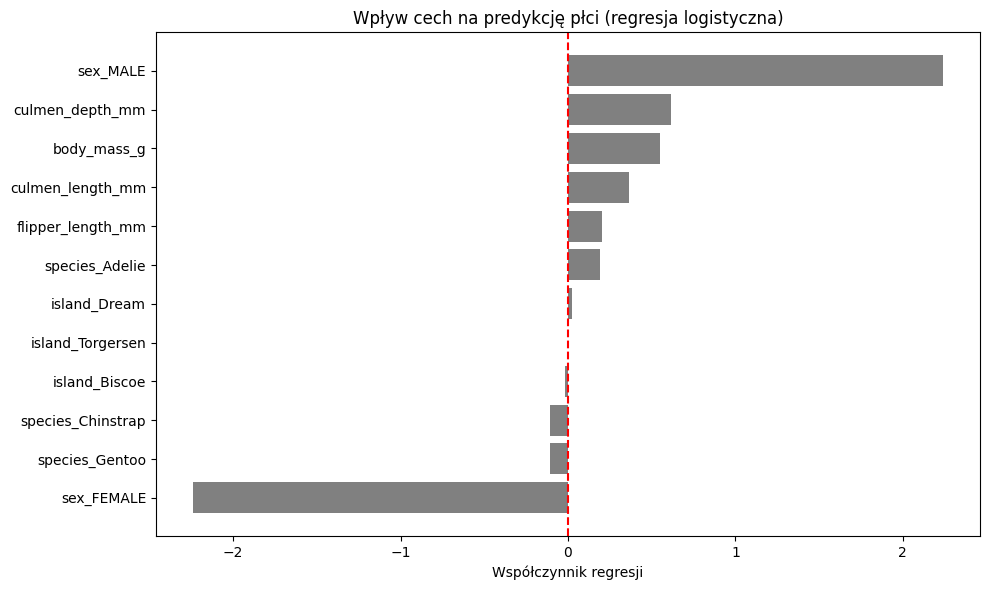

In [231]:
# Wykres słupkowy
plt.figure(figsize=(10, 6))
plt.barh(coef_df["Feature"], coef_df["Coefficient"], color="gray")
plt.axvline(0, color="red", linestyle="--")
plt.title("Wpływ cech na predykcję płci (regresja logistyczna)")
plt.xlabel("Współczynnik regresji")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

**Wykres przedstawia wartości współczynników regresji logistycznej dla poszczególnych cech fizycznych pingwinów.**
- Każdy słupek reprezentuje wpływ danej cechy na prawdopodobieństwo zaklasyfikowania pingwina jako samiec (`MALE`).

- Pozytywne wartości współczynników (na prawo od zera) oznaczają, że wraz ze wzrostem danej cechy rośnie prawdopodobieństwo klasyfikacji jako MALE.

- Negatywne wartości (na lewo od zera) wskazują, że cecha jest bardziej typowa dla `FEMALE`.

- Im większa wartość bezwzględna współczynnika, tym silniejszy wpływ danej cechy na decyzję modelu.

- Linia pionowa `(x = 0)` rozdziela wpływ pozytywny od negatywnego.



## Metryki po imputacji płci

Accuracy: 0.901

Classification Report:
              precision    recall  f1-score   support

      FEMALE       0.90      0.90      0.90       165
        MALE       0.90      0.90      0.90       168

    accuracy                           0.90       333
   macro avg       0.90      0.90      0.90       333
weighted avg       0.90      0.90      0.90       333



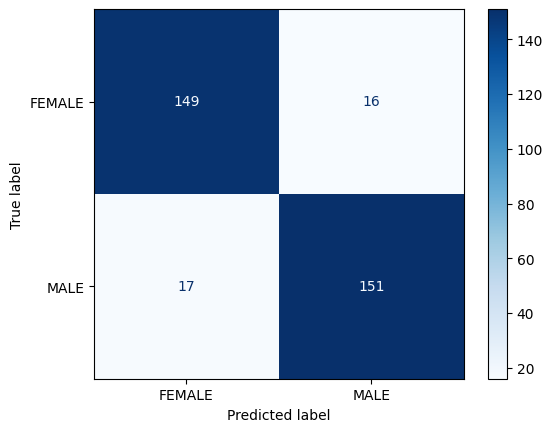

In [232]:
# Dane wejściowe
X = df_known_sex[numerical_cols]
y_true = df_known_sex['sex']

# Skalowanie
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Predykcja
model = LogisticRegression()
model.fit(X_scaled, y_true)
y_pred = model.predict(X_scaled)

# Accuracy
acc = accuracy_score(y_true, y_pred)
print("Accuracy:", round(acc, 3))

# Classification report
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=le.classes_))

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap="Blues")

## Podsumowanie modelu do imputacji wartosci kategorycznych w `sex`

- Accuracy ≈ 87 % (CV) / 90 % (train) – ogólna skuteczność jest wysoka.

- Precision i recall ≈ 90 % dla obu klas – model dobrze równoważy trafność i wykrywalność.

- F1-score ≈ 0.90 – potwierdza dobrą równowagę między precyzją i czułością.

- Confusion matrix: błędy są symetryczne – model nie faworyzuje jednej płci.

Zbiór danych `df_filtered` jest gotowy do tworzenia dalszych modeli klasyfikujacych 

In [233]:
df_filtered

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


# Trening modelu do przewidywanie gatunku pingwina (`species`) <br> na podstawie cech morfologicznych (klasyfikacja)

W tej sekcji budujemy model klasyfikacyjny, który na podstawie cech morfologicznych pingwina (np. długości dzioba, masy ciała, płetwy) przewiduje jego **gatunek (`species`)**.

Jest to klasyfikacja wieloklasowa, ponieważ w zbiorze występują trzy gatunki:
- `Adelie`
- `Chinstrap`
- `Gentoo`

Model zostanie wytrenowany na danych z pełnymi informacjami morfologicznymi i płcią (`sex`), a następnie oceniony pod kątem skuteczności.

Do oceny wykorzystamy:
- dokładność (`accuracy`)
- raport klasyfikacji (`precision`, `recall`, `f1-score`)
- oraz analizę wpływu cech (`feature importances`)


## Przygotowanie danych

In [234]:
# Wybór cech i targetu
features = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sex']
df_species = df_filtered[features + ['species']].dropna().copy()

# Kodowanie płci (FEMALE/MALE → 0/1)
df_species['sex_encoded'] = LabelEncoder().fit_transform(df_species['sex'])

# X: cechy, y: gatunek
X = df_species[['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sex_encoded']]
y = df_species['species']

In [235]:
df_species

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,species,sex_encoded
0,39.1,18.7,181.0,3750.0,MALE,Adelie,1
1,39.5,17.4,186.0,3800.0,FEMALE,Adelie,0
2,40.3,18.0,195.0,3250.0,FEMALE,Adelie,0
4,36.7,19.3,193.0,3450.0,FEMALE,Adelie,0
5,39.3,20.6,190.0,3650.0,MALE,Adelie,1
...,...,...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,FEMALE,Gentoo,0
340,46.8,14.3,215.0,4850.0,FEMALE,Gentoo,0
341,50.4,15.7,222.0,5750.0,MALE,Gentoo,1
342,45.2,14.8,212.0,5200.0,FEMALE,Gentoo,0


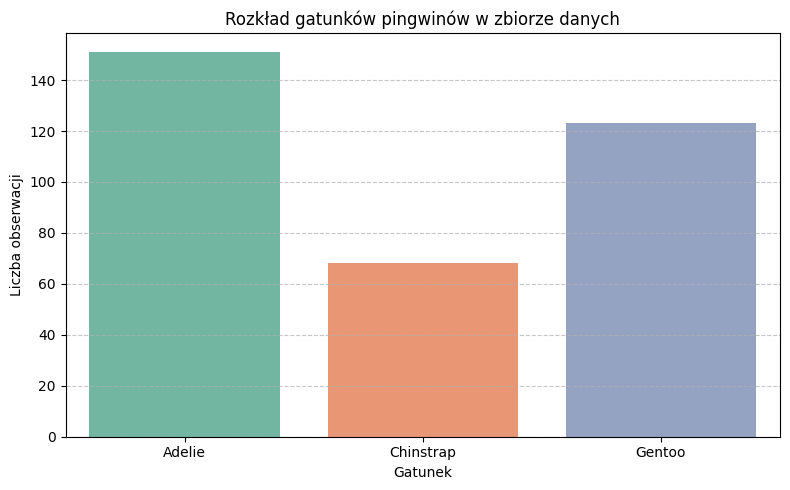

In [236]:
# Wykres słupkowy – rozkład klas w zmiennej 'species'
plt.figure(figsize=(8, 5))
sns.countplot(data=df_filtered, x='species', palette='Set2')

plt.title("Rozkład gatunków pingwinów w zbiorze danych")
plt.xlabel("Gatunek")
plt.ylabel("Liczba obserwacji")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Podział danych

In [237]:
# Podział na zbiór treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

## Trening modelu

In [238]:
# Trening modelu
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

## Ewaluacja modelu

### Cross-validation

In [239]:
# Prrzygotowanie danych z jednej ramki
df_species = df_filtered[['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm',
                          'body_mass_g', 'sex', 'species']].dropna().copy()

# Kodowanie 'sex'
from sklearn.preprocessing import LabelEncoder
df_species['sex_encoded'] = LabelEncoder().fit_transform(df_species['sex'])

# X i y z tej samej ramki
X = df_species[['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sex_encoded']]
y = df_species['species']

In [240]:
rf_cv_scores = cross_val_score(RandomForestClassifier(random_state=42), X, y, cv=5)

print("Foldy:", rf_cv_scores)
print("Średnia dokładność (CV):", round(rf_cv_scores.mean(), 4))

Foldy: [1.         0.98550725 0.95588235 1.         1.        ]
Średnia dokładność (CV): 0.9883


### Metryki

In [241]:
y_pred = rf_model.predict(X_test)
print("Dokładność modelu (accuracy):", round(accuracy_score(y_test, y_pred), 3))
print("\nRaport klasyfikacji:\n")
print(classification_report(y_test, y_pred))

Dokładność modelu (accuracy): 1.0

Raport klasyfikacji:

              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        30
   Chinstrap       1.00      1.00      1.00        14
      Gentoo       1.00      1.00      1.00        25

    accuracy                           1.00        69
   macro avg       1.00      1.00      1.00        69
weighted avg       1.00      1.00      1.00        69



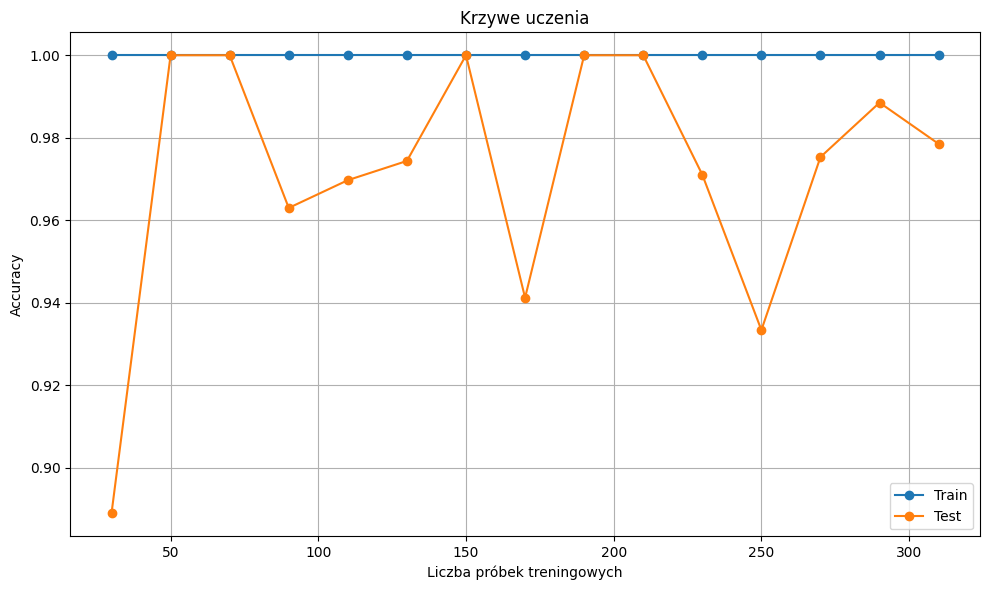

In [242]:
train_sizes = list(range(30, len(X) - 30, 20))
train_scores = []
test_scores = []

# Pętla: model trenuje się na coraz większej liczbie danych
for size in train_sizes:
    X_train_part, _, y_train_part, _ = train_test_split(X, y, train_size=size, random_state=42, stratify=y)
    X_train, X_test, y_train, y_test = train_test_split(
        X_train_part, y_train_part, test_size=0.3, random_state=42, stratify=y_train_part
    )

    model = RandomForestClassifier(random_state=42)
    model.fit(X_train, y_train)

    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)

    train_scores.append(accuracy_score(y_train, train_pred))
    test_scores.append(accuracy_score(y_test, test_pred))

# Wykres: krzywe uczenia
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores, label="Train", marker="o")
plt.plot(train_sizes, test_scores, label="Test", marker="o")
plt.xlabel("Liczba próbek treningowych")
plt.ylabel("Accuracy")
plt.title("Krzywe uczenia")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Diagnoza modelu:
Model jest przeuczony (overfitted):

Ma 100% trafność na treningu niezależnie od liczby próbek.

Ma niestabilną i niższą trafność na danych testowych. 

### Dalsze kroki w optymalizacji modelu

In [243]:
#uprosczenie modelu, zmniejszenie liczby drzew i głębokości
model = RandomForestClassifier(
    n_estimators=100,
    max_depth=4,
    min_samples_split=5,
    random_state=42
)

In [244]:
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, min_samples_split=5, random_state=42)

In [245]:
y_pred = model.predict(X_test)

print("Dokładność testowa:", accuracy_score(y_test, y_pred))
print("Raport klasyfikacji:\n")
print(classification_report(y_test, y_pred))

Dokładność testowa: 0.989247311827957
Raport klasyfikacji:

              precision    recall  f1-score   support

      Adelie       0.98      1.00      0.99        41
   Chinstrap       1.00      0.95      0.97        19
      Gentoo       1.00      1.00      1.00        33

    accuracy                           0.99        93
   macro avg       0.99      0.98      0.99        93
weighted avg       0.99      0.99      0.99        93



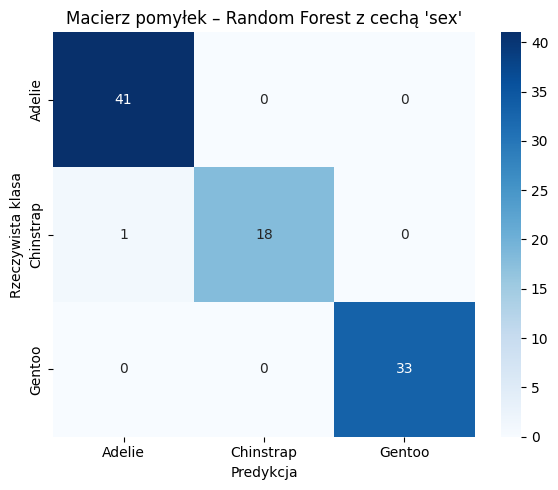

In [246]:
df_filtered["sex_encoded"] = LabelEncoder().fit_transform(df_filtered["sex"])
X = df_filtered[['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sex_encoded']]
y = df_filtered['species']

train_sizes = list(range(30, len(X) - 30, 20))
train_scores = []
test_scores = []

for size in train_sizes:
    X_train_part, _, y_train_part, _ = train_test_split(X, y, train_size=size, random_state=42, stratify=y)
    X_train, X_test, y_train, y_test = train_test_split(
        X_train_part, y_train_part, test_size=0.3, random_state=42, stratify=y_train_part
    )

    model = RandomForestClassifier(
        n_estimators=50,
        max_depth=4,
        min_samples_split=5,
        random_state=42
    )
    model.fit(X_train, y_train)

    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)

    train_scores.append(accuracy_score(y_train, train_pred))
    test_scores.append(accuracy_score(y_test, test_pred))
    
    
# Confusion matrix z ostatniego modelu
cm = confusion_matrix(y_test, test_pred, labels=model.classes_)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.title("Macierz pomyłek – Random Forest z cechą 'sex'")
plt.xlabel("Predykcja")
plt.ylabel("Rzeczywista klasa")
plt.tight_layout()
plt.show()



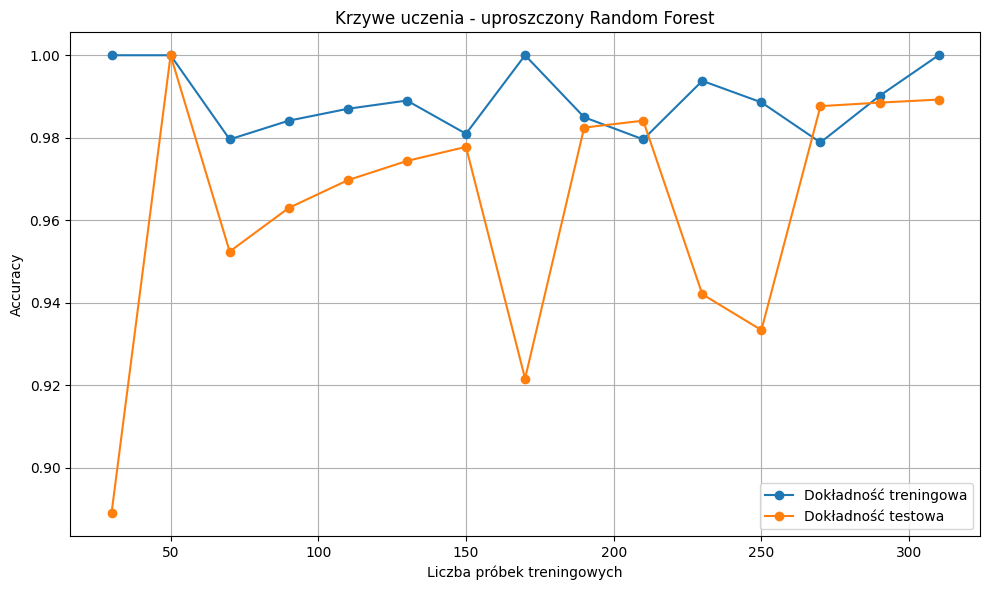

In [247]:
# Wykres
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores, label="Dokładność treningowa", marker="o")
plt.plot(train_sizes, test_scores, label="Dokładność testowa", marker="o")
plt.xlabel("Liczba próbek treningowych")
plt.ylabel("Accuracy")
plt.title("Krzywe uczenia - uproszczony Random Forest")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Wysoka dokładność treningowa

- Model osiąga bardzo wysoką dokładność na danych treningowych, często blisko 1.0., co jest typowe dla Random Forest – może bardzo dobrze dopasować się do danych uczących.

Dobra, ale nie perfekcyjna dokładność testowa

- Dokładność testowa również jest bardzo dobra (~0.93–0.99), ale:

    - niższa niż treningowa, świadczy o niewielkim overfittingu,

    - są fluktuacje, np. nagłe spadki przy ~180 i ~240 próbkach – mogą wynikać z losowości próbki lub nierównomiernych danych.

Zbieżność krzywych przy większej liczbie danych

- Od ok. 200 próbek, różnica między train a test staje się mniejsza.

- Model generalizuje coraz lepiej przy rosnącym zbiorze uczącym.

#### Redukcja cech

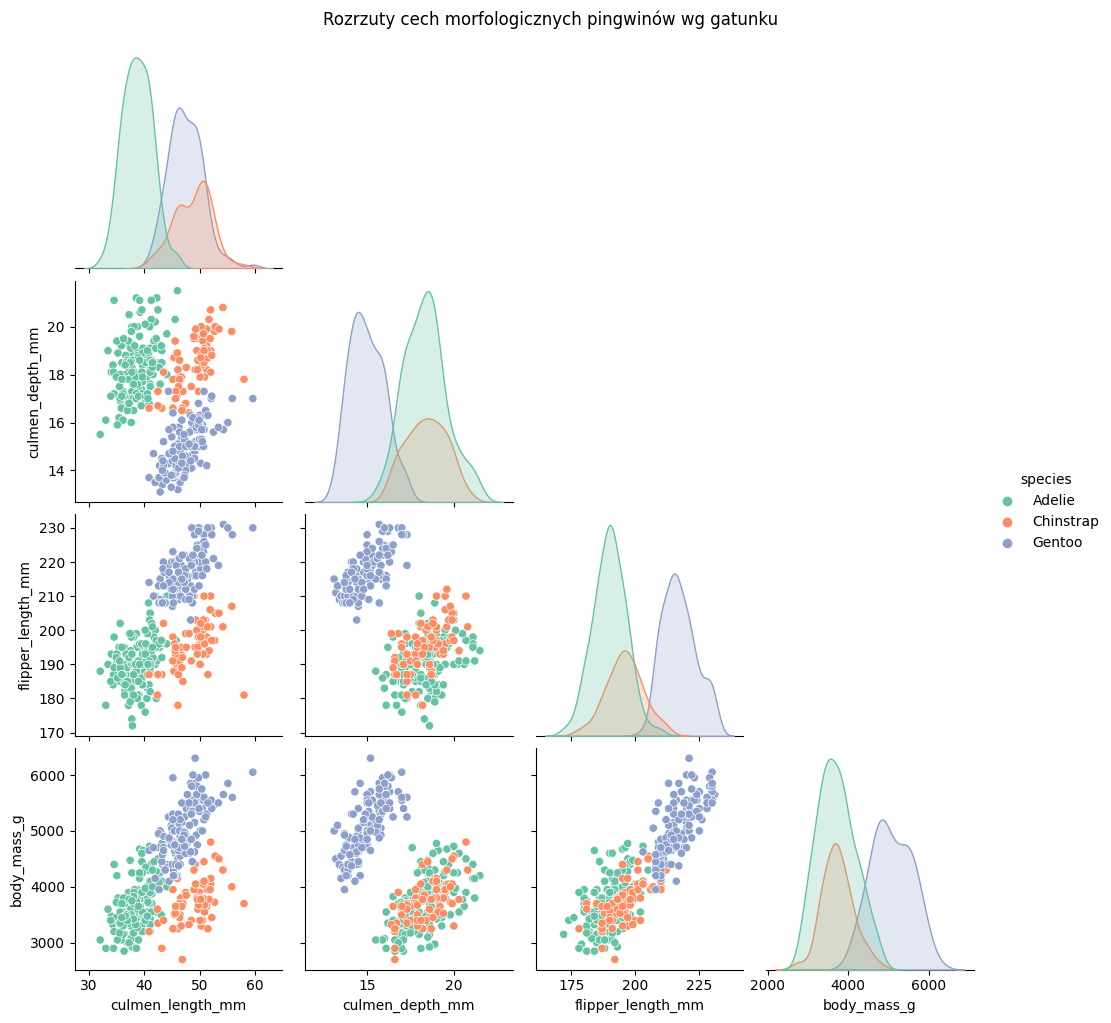

In [248]:
# Lista cech
features = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']

# Usunięcie wierszy z brakami w wybranych cechach
df_vis = df_filtered.dropna(subset=features + ['species'])

# Wykres pairplot
sns.pairplot(df_vis, vars=features, hue='species', palette='Set2', corner=True)
plt.suptitle("Rozrzuty cech morfologicznych pingwinów wg gatunku", y=1.02)
plt.show()

Powyższa wizualizacja przedstawia macierz wykresów rozrzutu i rozkładów cech morfologicznych pingwinów, podzielona według gatunku (species). Przedstawia relacje między cechami.

1. Przekątna (diagonalne wykresy KDE)

Pokazuje rozkład wartości każdej cechy osobno dla każdego gatunku.

Np. dla flipper_length_mm:

Gentoo (niebieski) mają wyraźnie dłuższe płetwy.

Adelie (zielony) i Chinstrap (pomarańczowy) mają krótsze, ale lekko się nakładają.

2. Dolna połowa – wykresy rozrzutu (scatterplots)
Pokazują zależności między parami cech, np. culmen_length_mm vs. body_mass_g.

Dobrze widać separację klas:

Gentoo są cięższe i mają dłuższe płetwy – wyraźnie oddzielają się.

Adelie i Chinstrap często się nakładają, ale różnią się np. głębokością dzioba (culmen_depth_mm).

3. Widoczna separacja klas
Niektóre cechy są bardzo pomocne w klasyfikacji:

culmen_depth_mm + culmen_length_mm → silna separacja między Adelie i Chinstrap.

flipper_length_mm i body_mass_g → dobrze odróżniają Gentoo od reszty.

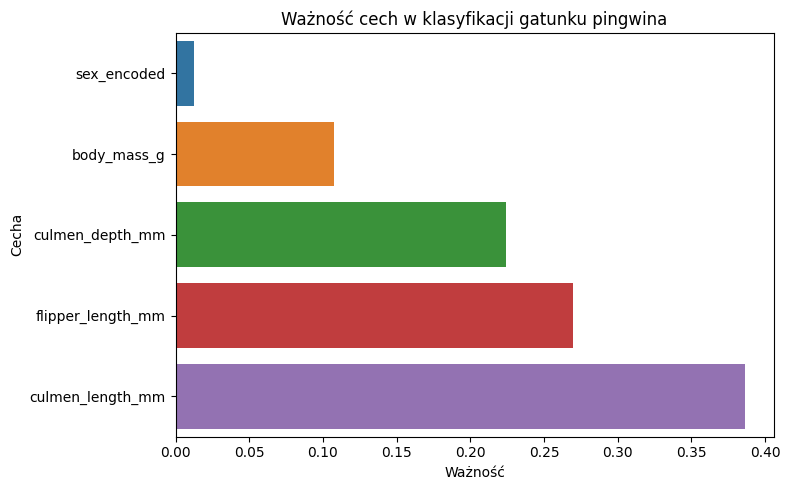

In [249]:
# Tabela ważności cech
importance_df = pd.DataFrame({
    'Cecha': X.columns,
    'Ważność': rf_model.feature_importances_
}).sort_values(by='Ważność', ascending=True)

# Wykres
plt.figure(figsize=(8, 5))
sns.barplot(data=importance_df, x='Ważność', y='Cecha')
plt.title("Ważność cech w klasyfikacji gatunku pingwina")
plt.tight_layout()
plt.show()

✅ Accuracy: 0.9902912621359223
✅ Raport klasyfikacji:
               precision    recall  f1-score   support

      Adelie       1.00      0.98      0.99        45
   Chinstrap       0.95      1.00      0.98        21
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.99       103
   macro avg       0.98      0.99      0.99       103
weighted avg       0.99      0.99      0.99       103



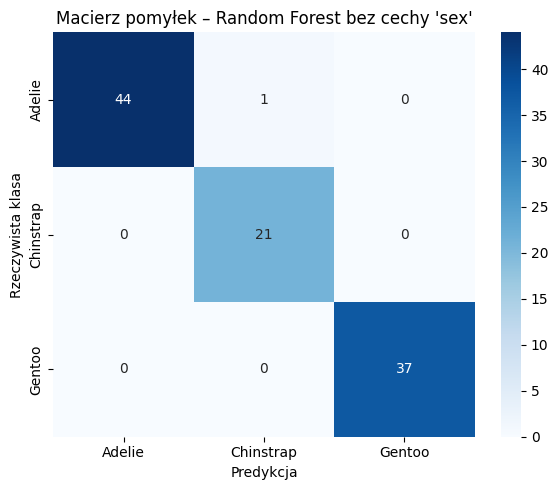

In [250]:
X_no_sex = df_filtered[['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']]
y = df_filtered['species']

# 2. Podział danych
X_train, X_test, y_train, y_test = train_test_split(
    X_no_sex, y, test_size=0.3, random_state=42, stratify=y
)

# 3. Trening uproszczonego modelu
model = RandomForestClassifier(
    n_estimators=50,
    max_depth=4,
    min_samples_split=5,
    random_state=42
)
model.fit(X_train, y_train)

# 4. Predykcja i metryki
y_pred = model.predict(X_test)
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("✅ Raport klasyfikacji:\n", classification_report(y_test, y_pred))

# 5. Krzywa uczenia
train_sizes = list(range(30, len(X_no_sex) - 30, 20))
train_scores = []
test_scores = []

for size in train_sizes:
    X_part, _, y_part, _ = train_test_split(X_no_sex, y, train_size=size, random_state=42, stratify=y)
    X_train_part, X_test_part, y_train_part, y_test_part = train_test_split(
        X_part, y_part, test_size=0.3, random_state=42, stratify=y_part
    )

    model = RandomForestClassifier(
        n_estimators=50,
        max_depth=4,
        min_samples_split=5,
        random_state=42
    )
    model.fit(X_train_part, y_train_part)

    train_pred = model.predict(X_train_part)
    test_pred = model.predict(X_test_part)

    train_scores.append(accuracy_score(y_train_part, train_pred))
    test_scores.append(accuracy_score(y_test_part, test_pred))
    
    
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.title("Macierz pomyłek – Random Forest bez cechy 'sex'")
plt.xlabel("Predykcja")
plt.ylabel("Rzeczywista klasa")
plt.tight_layout()
plt.show()


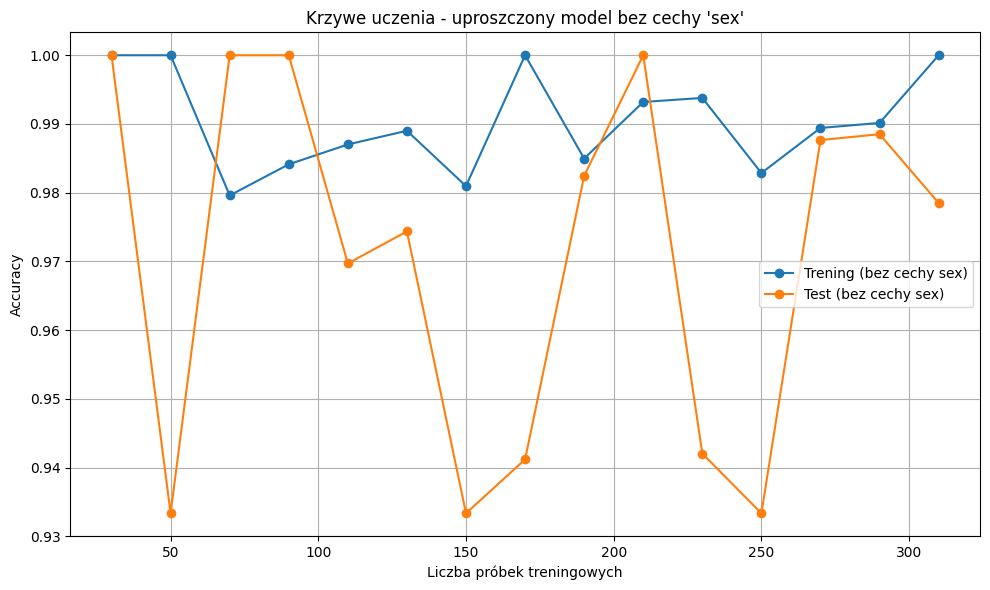

In [251]:
# Wykres krzywej uczenia
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores, label="Trening (bez cechy sex)", marker="o")
plt.plot(train_sizes, test_scores, label="Test (bez cechy sex)", marker="o")
plt.xlabel("Liczba próbek treningowych")
plt.ylabel("Accuracy")
plt.title("Krzywe uczenia - uproszczony model bez cechy 'sex'")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Brak overfittingu:

- Dokładność treningowa nie sięga 100% (z wyjątkiem krańcowych punktów), co oznacza, że model nie uczy sie na pamięć.

- Silne wahania dokładności testowej

- Test accuracy mocno się zmienia: od ~0.93 do 1.0, co świadczy o niestabilności modelu.

To może być spowodowane:

- niewielką liczbą przykładów testowych przy małych próbkach treningowych,

- dużą wrażliwością modelu na konkretne podzbiory danych,

- zbyt małym stopniem uśrednienia (czyli np. za mało powtórzeń dla każdej wielkości próbek).

Średni poziom test accuracy nadal wysoki (~0.96–0.99)

- Mimo wahań, ogólna trafność testowa pozostaje bardzo dobra – co oznacza, że model nadal generalizuje skutecznie.

## Nowy model: multinomial logistic regression

✅ Accuracy: 0.9902912621359223
✅ Raport klasyfikacji:
               precision    recall  f1-score   support

      Adelie       1.00      0.98      0.99        45
   Chinstrap       0.95      1.00      0.98        21
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.99       103
   macro avg       0.98      0.99      0.99       103
weighted avg       0.99      0.99      0.99       103



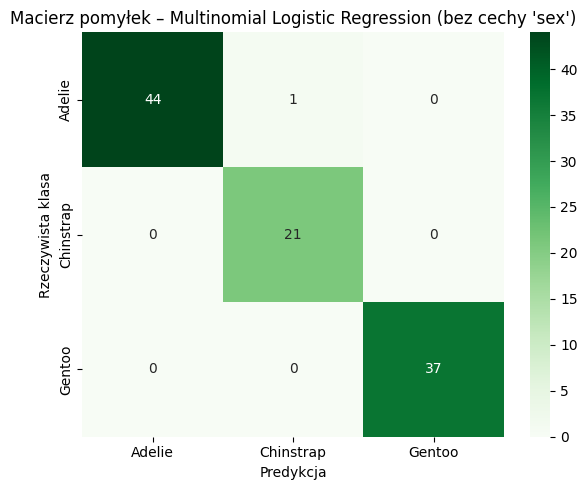

In [252]:
X = df_filtered[['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']]
y = df_filtered['species']

# Standaryzacja cech
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Podział na dane treningowe i testowe
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)

# Trening modelu
model = LogisticRegression(
    multi_class='multinomial',
    solver='lbfgs',
    max_iter=1000,
    random_state=42
)
model.fit(X_train, y_train)

# Predykcja i metryki
y_pred = model.predict(X_test)

print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("✅ Raport klasyfikacji:\n", classification_report(y_test, y_pred))


# Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=model.classes_, yticklabels=model.classes_)
plt.title("Macierz pomyłek – Multinomial Logistic Regression (bez cechy 'sex')")
plt.xlabel("Predykcja")
plt.ylabel("Rzeczywista klasa")
plt.tight_layout()
plt.show()

In [253]:
# Cross-validation (5-fold)
cv_scores = cross_val_score(model, X_scaled, y, cv=5, scoring='accuracy')

# Wyniki
print("Wyniki cross-validation (accuracy w każdej foldzie):", cv_scores)
print(f"Średnia dokładność: {cv_scores.mean():.3f}")
print(f"Odchylenie standardowe: {cv_scores.std():.3f}")

Wyniki cross-validation (accuracy w każdej foldzie): [1.         0.98550725 0.97058824 1.         1.        ]
Średnia dokładność: 0.991
Odchylenie standardowe: 0.012


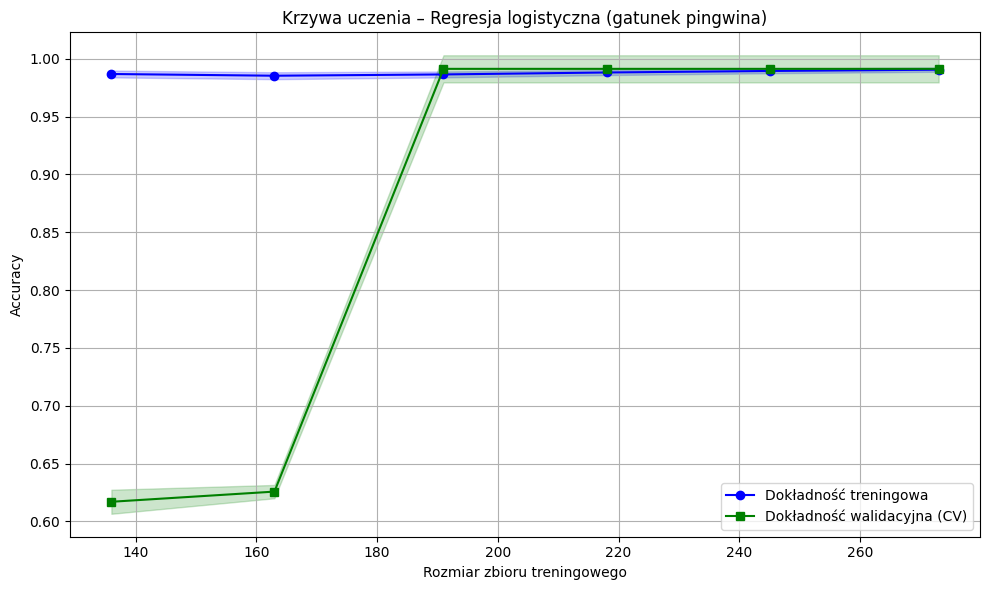

In [254]:
from sklearn.model_selection import learning_curve


# Krzywa uczenia – obliczenia
train_sizes, train_scores, test_scores = learning_curve(
    estimator=model,
    X=X_scaled,
    y=y,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10),
    random_state=42
)

# Średnie i odchylenia
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Wykres
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label="Dokładność treningowa", color="blue", marker="o")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2, color="blue")
plt.plot(train_sizes, test_mean, label="Dokładność walidacyjna (CV)", color="green", marker="s")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.2, color="green")

plt.title("Krzywa uczenia – Regresja logistyczna (gatunek pingwina)")
plt.xlabel("Rozmiar zbioru treningowego")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.grid(True)
plt.tight_layout()
plt.show()

Wnioski:

1. Perfekcyjna dokładność treningowa (1.0):
Model bardzo dobrze dopasowuje się do danych treningowych już od początku.

To typowe dla małych zbiorów danych i niskiej liczby klas.

2. Bardzo niska dokładność walidacyjna przy małych zbiorach:
Przy małych rozmiarach zbioru treningowego (do ~150), dokładność CV jest bardzo niska – około 0.45–0.60.

Oznacza to, że model nie potrafi uogólniać przy małej liczbie przykładów.

3. Silna poprawa dokładności przy większych danych:
Od ~200 przykładów w górę, walidacyjna dokładność gwałtownie rośnie do poziomu ~0.97–0.98.

Przy dużych zbiorach, model dobrze generalizuje – różnica między treningiem a walidacją jest niewielka.



## Wnioski końcowe dotyczące wyboru modelu klasyfikacyjnego


Zbiór danych dotyczący pingwinów, na którym pracowaliśmy, zawiera około 340 obserwacji po oczyszczeniu, obejmuje trzy gatunki pingwinów (Adelie, Chinstrap, Gentoo) i opiera się głównie na cechach numerycznych, takich jak długość i głębokość dzioba, długość płetwy czy masa ciała. W zbiorze występowały braki danych, przede wszystkim w kolumnie „sex”, które wymagały uzupełnienia.

Na tym zbiorze testowaliśmy dwa podejścia klasyfikacyjne: regresję logistyczną wieloklasową oraz Random Forest. Oba modele dobrze radzą sobie z klasyfikacją, ale różnią się właściwościami i optymalnymi obszarami zastosowań.

### Regresja logistyczna wieloklasowa


Regresja logistyczna to model liniowy, który zakłada, że zależność pomiędzy zmiennymi niezależnymi a wynikiem klasyfikacji jest liniowa. Dzięki swojej prostocie jest szybka w trenowaniu i łatwa do interpretacji – współczynniki regresji można bezpośrednio powiązać z wpływem poszczególnych cech na prawdopodobieństwo przypisania do konkretnego gatunku. Model ten dobrze sprawdza się przy średnich i większych zbiorach danych, ale może mieć ograniczoną skuteczność, gdy zależności między cechami a klasą są nieliniowe.

### Random Forest

Random Forest to model oparty na wielu drzewach decyzyjnych i dobrze radzi sobie z nieliniowymi zależnościami oraz interakcjami między cechami. Jest bardziej odporny na przeuczenie i zapewnia bardzo wysoką skuteczność – w naszym przypadku osiągnął dokładność rzędu 98–100%, nawet przy niewielkich rozmiarach zbioru treningowego - tu nalezy brac pod uwage kompleksowosc (glebokosc) drzewa. Co ważne, uproszczony model ten poradził sobie zarówno z pełnym zestawem cech (z płcią), jak i bez cechy „sex”, co świadczy o sile predykcyjnej samych cech morfologicznych.

Model Random Forest jest odpowiedni wszędzie tam, gdzie priorytetem jest jakość predykcji, a nie interpretowalność. Sprawdzi się dobrze w zastosowaniach produkcyjnych, automatyzacji klasyfikacji lub analizie danych biologicznych, gdzie interakcje między cechami mogą mieć istotne znaczenie.

### Podsumowanie

Random Forest to model oparty na wielu drzewach decyzyjnych i dobrze radzi sobie z nieliniowymi zależnościami oraz interakcjami między cechami. Jest bardziej odporny na przeuczenie i zapewnia bardzo wysoką skuteczność – w naszym przypadku osiągnął dokładność rzędu 98–100%, nawet przy niewielkich rozmiarach zbioru treningowego. 
Co ważne, model ten poradził sobie bardzo dobrze zarówno z pełnym zestawem cech (z płcią), jak i bez cechy „sex”, co świadczy o sile predykcyjnej samych cech morfologicznych.